In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import time
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [16]:
trainDF = pd.read_csv('../app/data/02_train.csv', sep=';')
testDF = pd.read_csv('../app/data/02_test.csv', sep=';')

In [17]:
X_train = trainDF.drop(['totalPrice'], axis=1)
y_train = trainDF['totalPrice']
X_test = testDF.drop(['totalPrice'], axis=1)
y_test = testDF['totalPrice']

In [18]:
X = X_train
y = y_train

In [25]:
X_train

,floorType,floor,Lng,Lat,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,...,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeYear,tradeMonth,tradeDay,constructionTimePeriod
0,84113,6,116.474283,39.930035,51.82,2,1,1,1,120872,...,0.250,0.0,1.0,1.0,7,67222.0,2015,10,9,16727
1,84113,32,116.416156,40.082585,97.78,2,1,1,1,59076,...,0.375,1.0,0.0,1.0,6,33820.0,2011,11,13,139258
2,44810,6,116.520858,39.918846,61.13,2,1,1,1,120872,...,0.333,0.0,1.0,1.0,7,56752.0,2015,4,12,13522
3,44810,6,116.350909,39.745849,62.82,2,1,1,1,120872,...,0.333,0.0,1.0,0.0,4,38492.0,2014,8,24,13522
4,49078,6,116.351933,39.887523,68.89,2,1,1,1,120872,...,0.500,0.0,1.0,0.0,10,87885.0,2016,2,2,139258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223166,84113,13,116.416187,39.969551,119.16,2,2,1,1,41709,...,0.143,1.0,1.0,0.0,1,92338.0,2013,1,4,139258
223167,84113,7,116.298972,39.943157,119.07,2,2,1,2,120872,...,0.500,1.0,1.0,1.0,8,87420.0,2016,5,9,139258
223168,26053,13,116.440460,39.860650,120.14,3,1,1,2,120872,...,0.500,1.0,1.0,0.0,2,57690.0,2016,4,30,52909
223169,49078,19,116.368316,39.892214,74.61,2,1,1,1,59076,...,0.250,1.0,1.0,1.0,10,75806.0,2014,4,28,139258


In [30]:
X_train['subway'].unique()

array([1., 0.])

In [35]:
StandardScaler().fit_transform(X_train[['subway']])

array([[ 0.81518316],
       [ 0.81518316],
       [ 0.81518316],
       ...,
       [-1.22671817],
       [ 0.81518316],
       [ 0.81518316]])

In [19]:
pipe = make_pipeline(StandardScaler(), SGDRegressor(alpha=0.0001, loss='squared_loss', penalty='l1', random_state=42))

In [20]:
estimators = [
    ("pipe", pipe),
    ("RandomFR", RandomForestRegressor(n_jobs=-1)),
    ("Gradient Boosting", HistGradientBoostingRegressor()),
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV(), n_jobs=-1)

/home/glatzlandre@edu.local/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/glatzlandre@edu.local/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/glatzlandre@edu.local/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(
/home/glatzlandre@edu.local/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: 

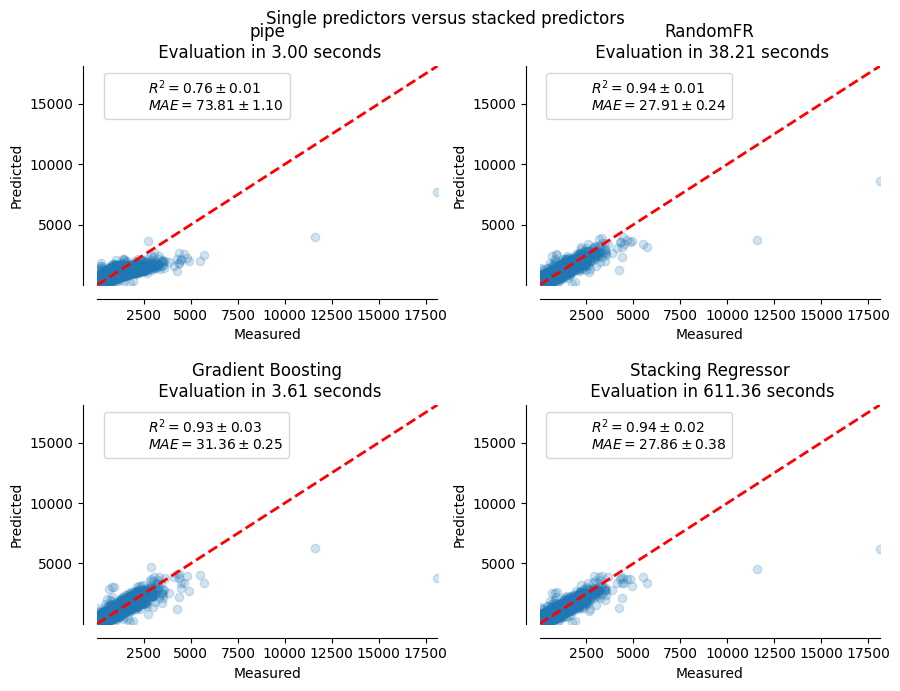

In [21]:
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=-1, verbose=0
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.mean(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.mean(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()